In [2]:
!pip install opendatasets

In [3]:
!pip install pandas

In [4]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mahesh2244
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection


100%|██████████| 84.0M/84.0M [00:05<00:00, 16.6MB/s]


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop, Adam
import glob
from PIL import Image
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [6]:
No_Data_Path = Path("/content/brain-tumor-detection/no")
Yes_Data_Path = Path("/content/brain-tumor-detection/yes")

In [7]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [8]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[PosixPath('/content/brain-tumor-detection/no/no1118.jpg'), PosixPath('/content/brain-tumor-detection/no/no791.jpg'), PosixPath('/content/brain-tumor-detection/no/no278.jpg'), PosixPath('/content/brain-tumor-detection/no/no1250.jpg'), PosixPath('/content/brain-tumor-detection/no/no976.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('/content/brain-tumor-detection/yes/y308.jpg'), PosixPath('/content/brain-tumor-detection/yes/y70.jpg'), PosixPath('/content/brain-tumor-detection/yes/y365.jpg'), PosixPath('/content/brain-tumor-detection/yes/y1058.jpg'), PosixPath('/content/brain-tumor-detection/yes/y502.jpg')]


In [9]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)

for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [10]:
print(Yes_No_List[0:10])


[PosixPath('/content/brain-tumor-detection/no/no1118.jpg'), PosixPath('/content/brain-tumor-detection/no/no791.jpg'), PosixPath('/content/brain-tumor-detection/no/no278.jpg'), PosixPath('/content/brain-tumor-detection/no/no1250.jpg'), PosixPath('/content/brain-tumor-detection/no/no976.jpg'), PosixPath('/content/brain-tumor-detection/no/no702.jpg'), PosixPath('/content/brain-tumor-detection/no/no218.jpg'), PosixPath('/content/brain-tumor-detection/no/no1276.jpg'), PosixPath('/content/brain-tumor-detection/no/no1219.jpg'), PosixPath('/content/brain-tumor-detection/no/no1237.jpg')]


In [11]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [12]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [13]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1500


In [14]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [15]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [16]:
print(Main_Train_Data.head(-1))


                                               JPG TUMOR_CATEGORY
0     /content/brain-tumor-detection/no/no1118.jpg             no
1      /content/brain-tumor-detection/no/no791.jpg             no
2      /content/brain-tumor-detection/no/no278.jpg             no
3     /content/brain-tumor-detection/no/no1250.jpg             no
4      /content/brain-tumor-detection/no/no976.jpg             no
...                                            ...            ...
2994   /content/brain-tumor-detection/yes/y817.jpg            yes
2995   /content/brain-tumor-detection/yes/y130.jpg            yes
2996   /content/brain-tumor-detection/yes/y763.jpg            yes
2997    /content/brain-tumor-detection/yes/y80.jpg            yes
2998   /content/brain-tumor-detection/yes/y719.jpg            yes

[2999 rows x 2 columns]


In [17]:
Prediction_Path = Path("../input/brain-tumor-detection/pred")


In [18]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))


In [19]:
print(Test_JPG_Path[0:5])


[]


In [20]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))


In [21]:
print(Test_JPG_Labels[0:5])


[]


In [22]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [23]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)


In [24]:
print(Test_Data.head())


Empty DataFrame
Columns: [JPG, TUMOR_CATEGORY]
Index: []


In [25]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)


In [26]:
print(Main_Train_Data.head(-1))



                                               JPG TUMOR_CATEGORY
0     /content/brain-tumor-detection/no/no1335.jpg             no
1     /content/brain-tumor-detection/yes/y1328.jpg            yes
2      /content/brain-tumor-detection/yes/y246.jpg            yes
3      /content/brain-tumor-detection/no/no985.jpg             no
4      /content/brain-tumor-detection/yes/y912.jpg            yes
...                                            ...            ...
2994  /content/brain-tumor-detection/no/no1255.jpg             no
2995   /content/brain-tumor-detection/no/no944.jpg             no
2996  /content/brain-tumor-detection/no/no1120.jpg             no
2997   /content/brain-tumor-detection/yes/y715.jpg            yes
2998  /content/brain-tumor-detection/yes/y1130.jpg            yes

[2999 rows x 2 columns]


Text(0.5, 1.0, 'yes')

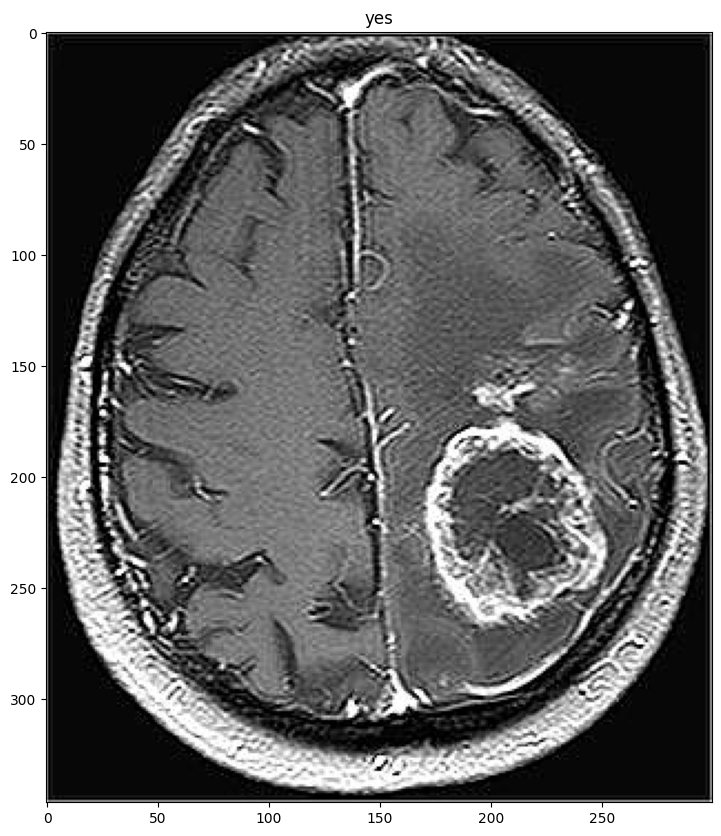

In [27]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'yes')

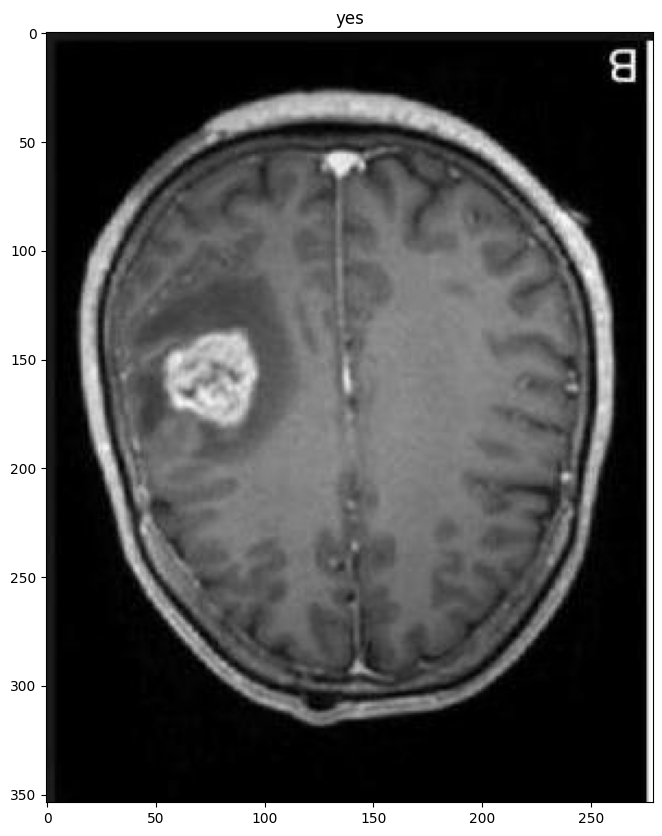

In [28]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

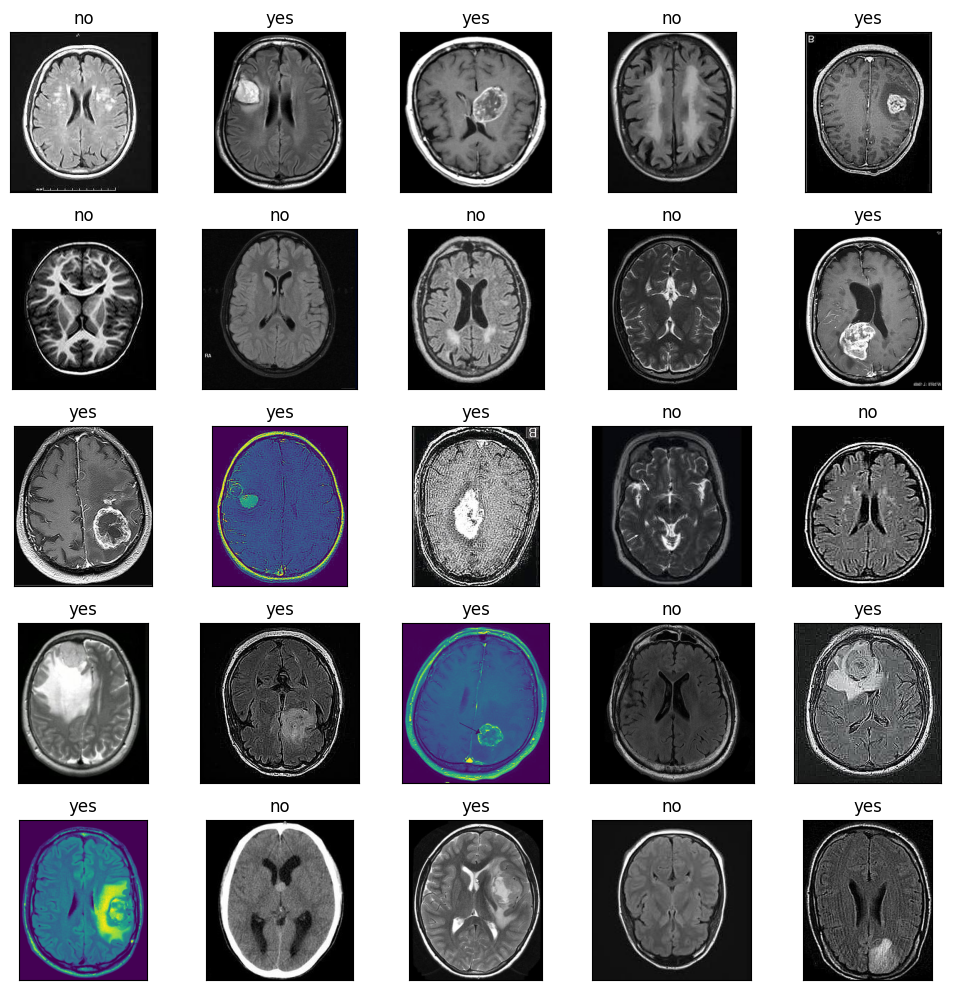

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

In [30]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)


In [31]:
print(train_data.shape)


(2700, 2)


In [32]:
print(train_data.head())


                                              JPG TUMOR_CATEGORY
433   /content/brain-tumor-detection/no/no839.jpg             no
1151  /content/brain-tumor-detection/no/no423.jpg             no
73    /content/brain-tumor-detection/no/no154.jpg             no
1536  /content/brain-tumor-detection/yes/y684.jpg            yes
2709   /content/brain-tumor-detection/no/no92.jpg             no


In [33]:
print(test_data.shape)


(300, 2)


In [34]:
print(test_data.head())


                                               JPG TUMOR_CATEGORY
1801  /content/brain-tumor-detection/no/no1421.jpg             no
1190   /content/brain-tumor-detection/no/no895.jpg             no
1817  /content/brain-tumor-detection/yes/y1253.jpg            yes
251    /content/brain-tumor-detection/yes/y210.jpg            yes
2505   /content/brain-tumor-detection/no/no671.jpg             no


In [35]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [36]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [37]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [38]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


In [39]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [40]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [41]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [42]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 1, 0, 1]
(200, 200, 1)


In [43]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 0, 1, 0]
(200, 200, 1)


In [44]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)


{'no': 0, 'yes': 1}
[0, 0, 1, 1, 0]
(200, 200, 1)


In [45]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))

In [46]:
Model.compile(optimizer=RMSprop(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
# Change 'lr' to 'learning_rate' in the RMSprop optimizer

In [47]:
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=30,steps_per_epoch=120)

Epoch 1/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - accuracy: 0.6592 - loss: 1.0103 - val_accuracy: 0.7926 - val_loss: 0.4393
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7756 - loss: 0.5104 - val_accuracy: 0.7963 - val_loss: 0.4908
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.8040 - loss: 0.4268 - val_accuracy: 0.8444 - val_loss: 0.4027
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9504 - loss: 0.2747 - val_accuracy: 0.8852 - val_loss: 0.3524
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.8563 - loss: 0.3368 - val_accuracy: 0.8296 - val_loss: 0.3839
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8248 - loss: 0.3529 - val_accuracy: 0.8889 - val_loss: 0.3009
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.8990 - loss: 0.2556 - val_accuracy: 0.8889 - val_loss: 0.2662
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9500 - loss: 0.1230 - val_accu

In [48]:
print(Model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 196, 196, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 96, 96, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      13,107,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,994,182 (102.97 MB)

 Trainable params: 13,497,090 (51.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,497,092 (51.49 MB)

None


In [49]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

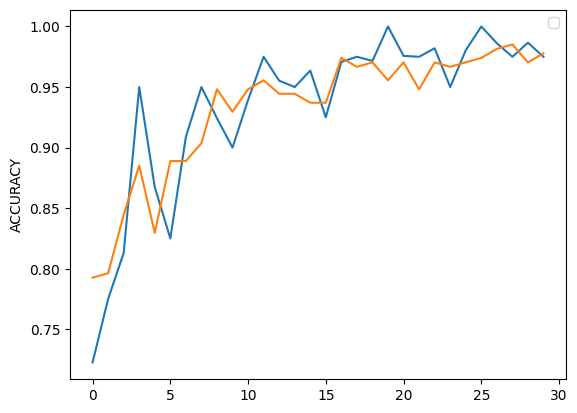

In [50]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

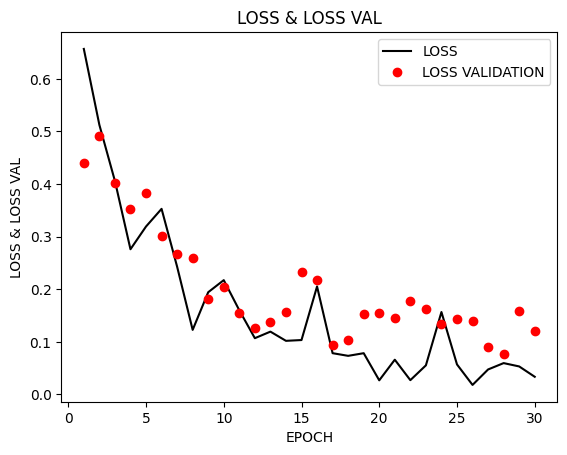

In [51]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()


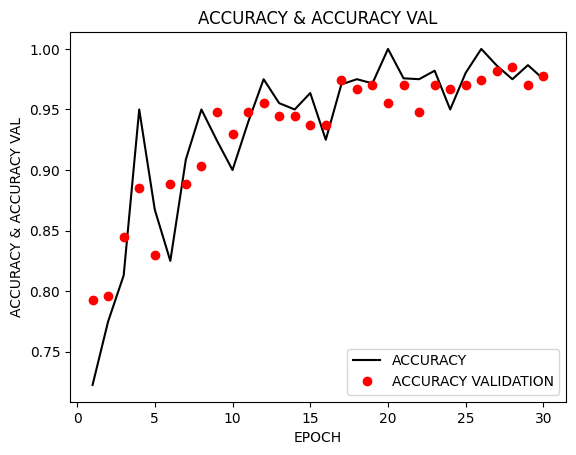

In [52]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()


<Axes: >

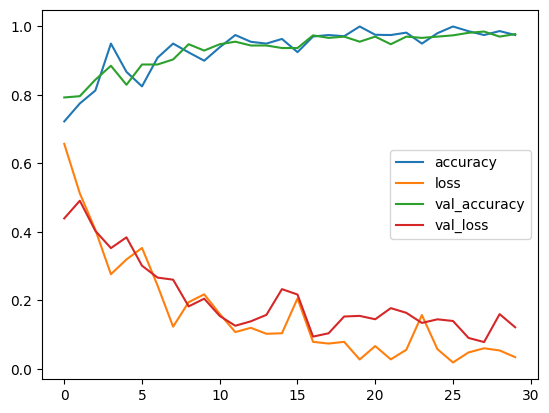

In [53]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

In [54]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.0388
ACCURACY:  0.99


In [55]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [56]:
print(Main_Data_Prediction.head())

Empty DataFrame
Columns: [JPG]
Index: []


In [57]:
Main_Test_Generator = ImageDataGenerator(rescale=1./255)

In [62]:
print(Main_Data_Prediction.columns)


Index(['JPG'], dtype='object')


In [63]:
print(Main_Data_Prediction.shape)  # Check number of rows and columns
print(Main_Data_Prediction.head())  # Show the first few rows


(0, 1)
Empty DataFrame
Columns: [JPG]
Index: []


In [64]:
print(Main_Data_Prediction["JPG"].dtype)

object


In [65]:
Main_Data_Prediction["JPG"] = Main_Data_Prediction["JPG"].str.strip()


In [66]:
print(Main_Data_Prediction.isnull().sum())  # Check for NaN values



JPG    0
dtype: int64


In [68]:
import os

missing_files = [path for path in Main_Data_Prediction["JPG"] if not os.path.exists(path)]
print(f"Missing files: {len(missing_files)}")


Missing files: 0


In [70]:
print(Main_Data_Prediction.columns)
print(Main_Data_Prediction.head())


Index(['JPG'], dtype='object')
Empty DataFrame
Columns: [JPG]
Index: []


In [71]:
print(type(Test_JPG_Path_Series))  # Should be a pandas Series
print(len(Test_JPG_Path_Series))   # Should be > 0
print(Test_JPG_Path_Series.head()) # Should contain valid file paths


<class 'pandas.core.series.Series'>
0
Series([], Name: JPG, dtype: object)


In [73]:
import os
import pandas as pd

# Example: Assuming test images are in 'test_images/' directory
test_image_dir = "/content/brain-tumor-detection/Br35H-Mask-RCNN/TEST"

# List all JPG files
Test_JPG_Path_Series = pd.Series([os.path.join(test_image_dir, f) for f in os.listdir(test_image_dir) if f.endswith(".jpg")])

# Check if it has paths now
print(Test_JPG_Path_Series.head())


0    /content/brain-tumor-detection/Br35H-Mask-RCNN...
1    /content/brain-tumor-detection/Br35H-Mask-RCNN...
2    /content/brain-tumor-detection/Br35H-Mask-RCNN...
3    /content/brain-tumor-detection/Br35H-Mask-RCNN...
4    /content/brain-tumor-detection/Br35H-Mask-RCNN...
dtype: object


In [74]:
Main_Data_Prediction = pd.DataFrame({"JPG": Test_JPG_Path_Series.astype(str)})
print(Main_Data_Prediction.head())  # Should now have paths!



                                                 JPG
0  /content/brain-tumor-detection/Br35H-Mask-RCNN...
1  /content/brain-tumor-detection/Br35H-Mask-RCNN...
2  /content/brain-tumor-detection/Br35H-Mask-RCNN...
3  /content/brain-tumor-detection/Br35H-Mask-RCNN...
4  /content/brain-tumor-detection/Br35H-Mask-RCNN...


In [75]:
missing_files = [f for f in Main_Data_Prediction["JPG"] if not os.path.exists(f)]
print(f"Missing files: {len(missing_files)}")

if len(missing_files) > 0:
    print(missing_files[:5])  # Show some missing file names


Missing files: 0


In [76]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(
    dataframe=Main_Data_Prediction,
    x_col="JPG",
    y_col=None,
    color_mode="grayscale",
    class_mode=None,
    batch_size=20,
    target_size=(200, 200)
)


Found 100 validated image filenames.


In [77]:
Model_Test_Prediction = Model.predict(Main_Test_Set)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [78]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)


In [80]:
print(Model_Test_Prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [81]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)


['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO']


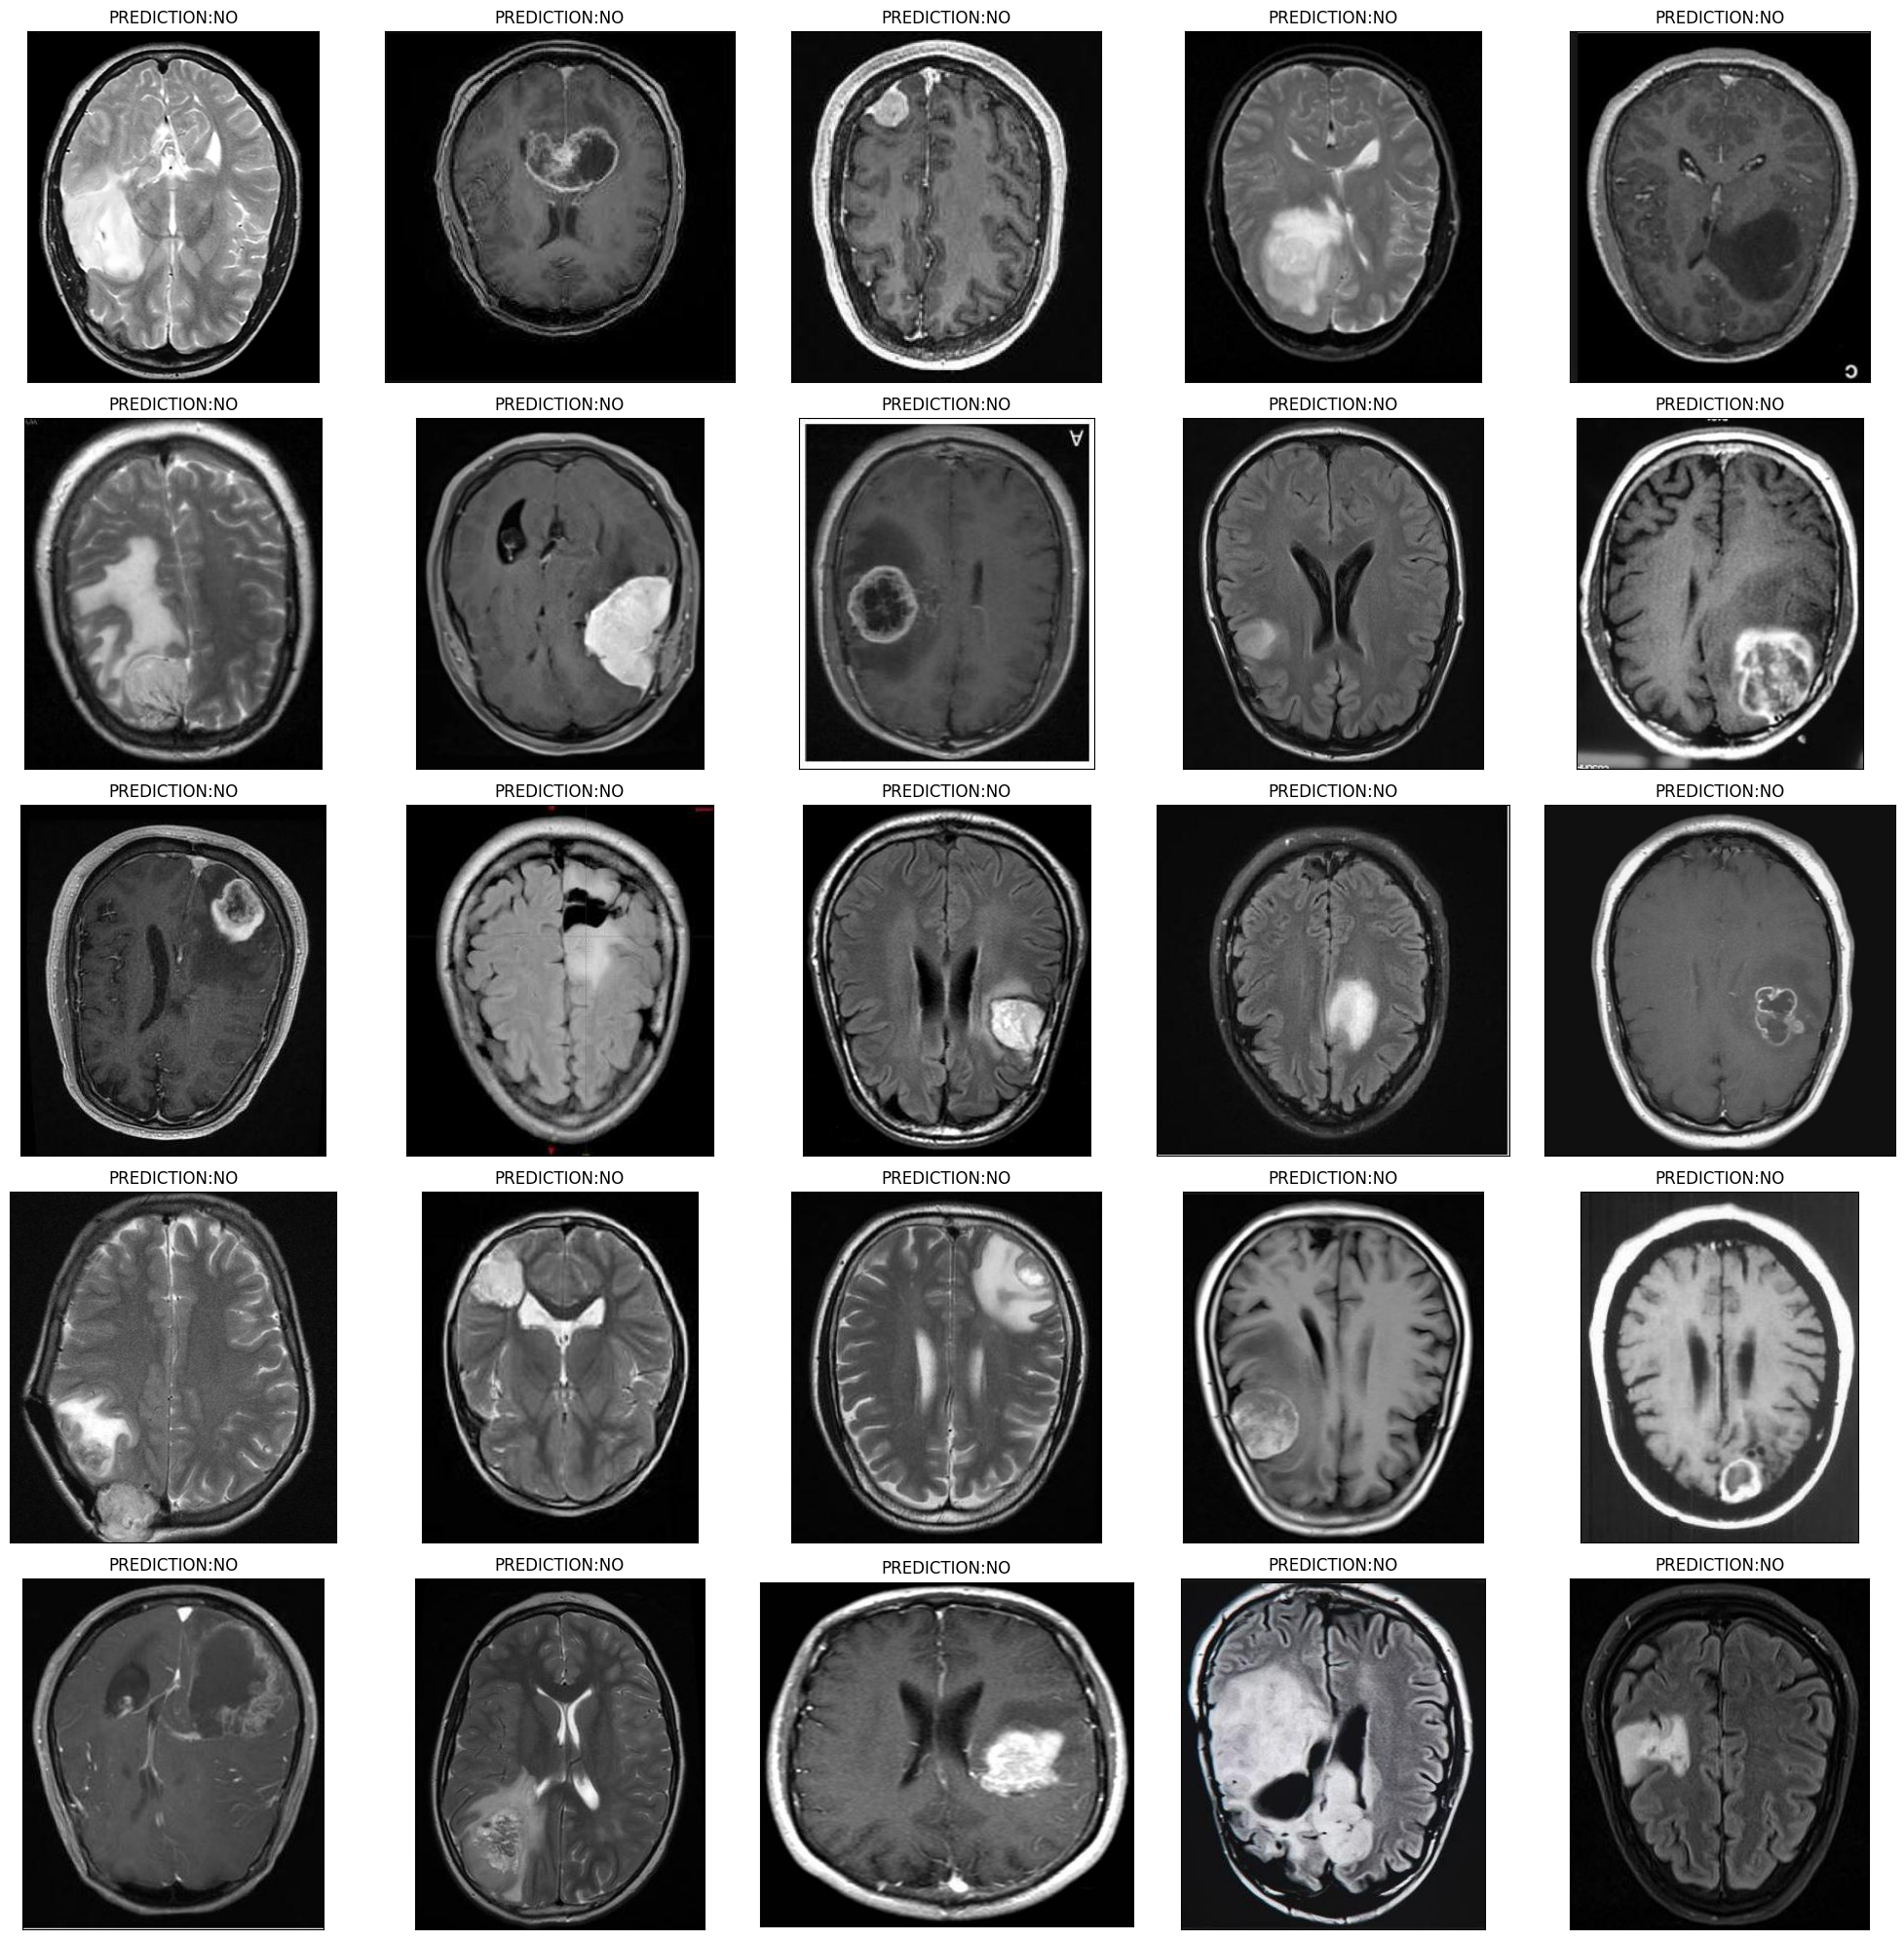

In [82]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()

In [83]:
Data_Generator_Div = ImageDataGenerator(rescale=1./255,brightness_range=[0.3,0.9],
                                       rotation_range=30,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest",
                                       validation_split=0.1)

In [84]:
Train_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))


Found 2430 validated image filenames belonging to 2 classes.


In [88]:
Validation_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))
                                                     # Removed duplicate and incorrect indentation lines

Found 270 validated image filenames belonging to 2 classes.


In [89]:
Test_Set_Div = Data_Generator_Div.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 100 validated image filenames.


# CNN MODEL FOR NON-DIVERSIFICATION

####MODEL STRUCTURE

In [90]:
Model_Two = Sequential()

Model_Two.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(64,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(256,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Flatten())
Model_Two.add(Dropout(0.5))
Model_Two.add(Dense(512,activation="relu"))
Model_Two.add(Dense(2,activation="softmax"))


#### MODEL COMPILE

In [92]:
Model_Two.compile(optimizer=RMSprop(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
# Change 'lr' to 'learning_rate' in the RMSprop optimizer

#### MODEL FITTING

In [ ]:
ANN_Model_Two = Model_Two.fit(Train_Set_Div,
                              validation_data=Validation_Set_Div,
                              batch_size=20,
                      epochs=50)

#### MODEL SUMMARY

In [94]:
print(Model_Two.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 196, 196, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 98, 98, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 96, 96, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,269,254 (20.10 MB)

 Trainable params: 2,634,626 (10.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,634,628 (10.05 MB)

None


#### CHECKING MODEL WITH GRAPHIC

In [95]:
HistoryDict_Two = ANN_Model_Two.history

val_losses_Two = HistoryDict_Two["val_loss"]
val_acc_Two = HistoryDict_Two["val_accuracy"]
acc_Two = HistoryDict_Two["accuracy"]
losses_Two = HistoryDict_Two["loss"]
epochs_Two = range(1,len(val_losses_Two)+1)

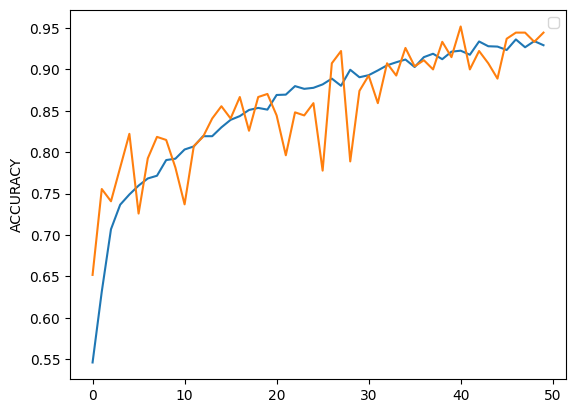

In [96]:
plt.plot(ANN_Model_Two.history["accuracy"])
plt.plot(ANN_Model_Two.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

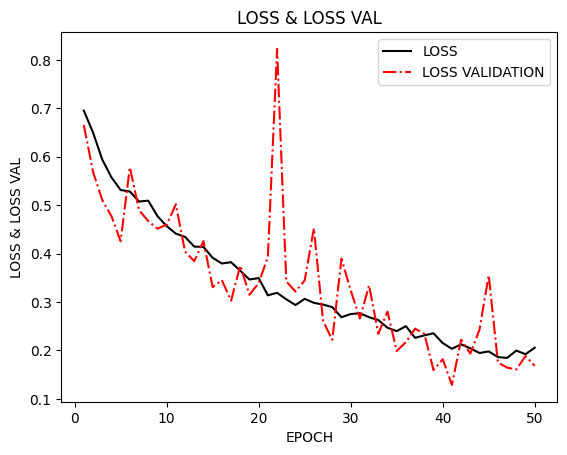

In [97]:
plt.plot(epochs_Two,losses_Two,"k-",label="LOSS")
plt.plot(epochs_Two,val_losses_Two,"r-.",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()


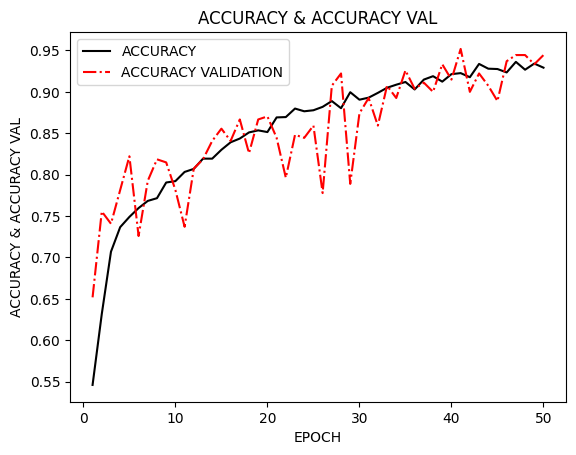

In [98]:
plt.plot(epochs_Two,acc_Two,"k-",label="ACCURACY")
plt.plot(epochs_Two,val_acc_Two,"r-.",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()


<Axes: >

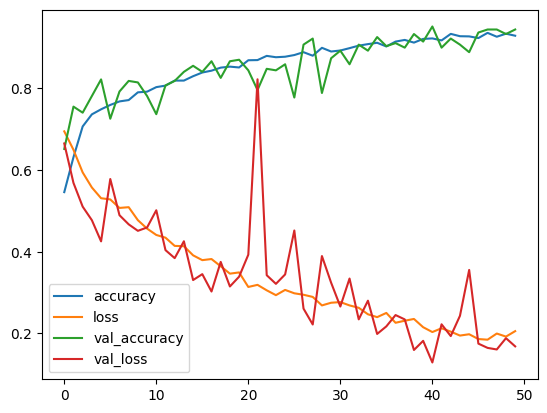

In [99]:
Dict_Summary_Two = pd.DataFrame(ANN_Model_Two.history)
Dict_Summary_Two.plot()

#### PREDICTION SCORE ON DIVIDED DATA

In [100]:
Model_Results_Two = Model_Two.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_Two[0])
print("ACCURACY:  " + "%.2f" % Model_Results_Two[1])

LOSS:  0.4053
ACCURACY:  0.91


PREDICTION PROCESS

In [101]:
Model_Test_Prediction_Two = Model_Two.predict(Test_Set_Div)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


In [102]:
Model_Test_Prediction_Two = Model_Test_Prediction_Two.argmax(axis=-1)

In [103]:
print(Model_Test_Prediction_Two)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]


In [104]:
Last_Prediction_Two = []
[Last_Prediction_Two.append('NO') if i == 1 else Last_Prediction_Two.append('TUMOR') for i in Model_Test_Prediction_Two]
print(Last_Prediction_Two)

['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO']


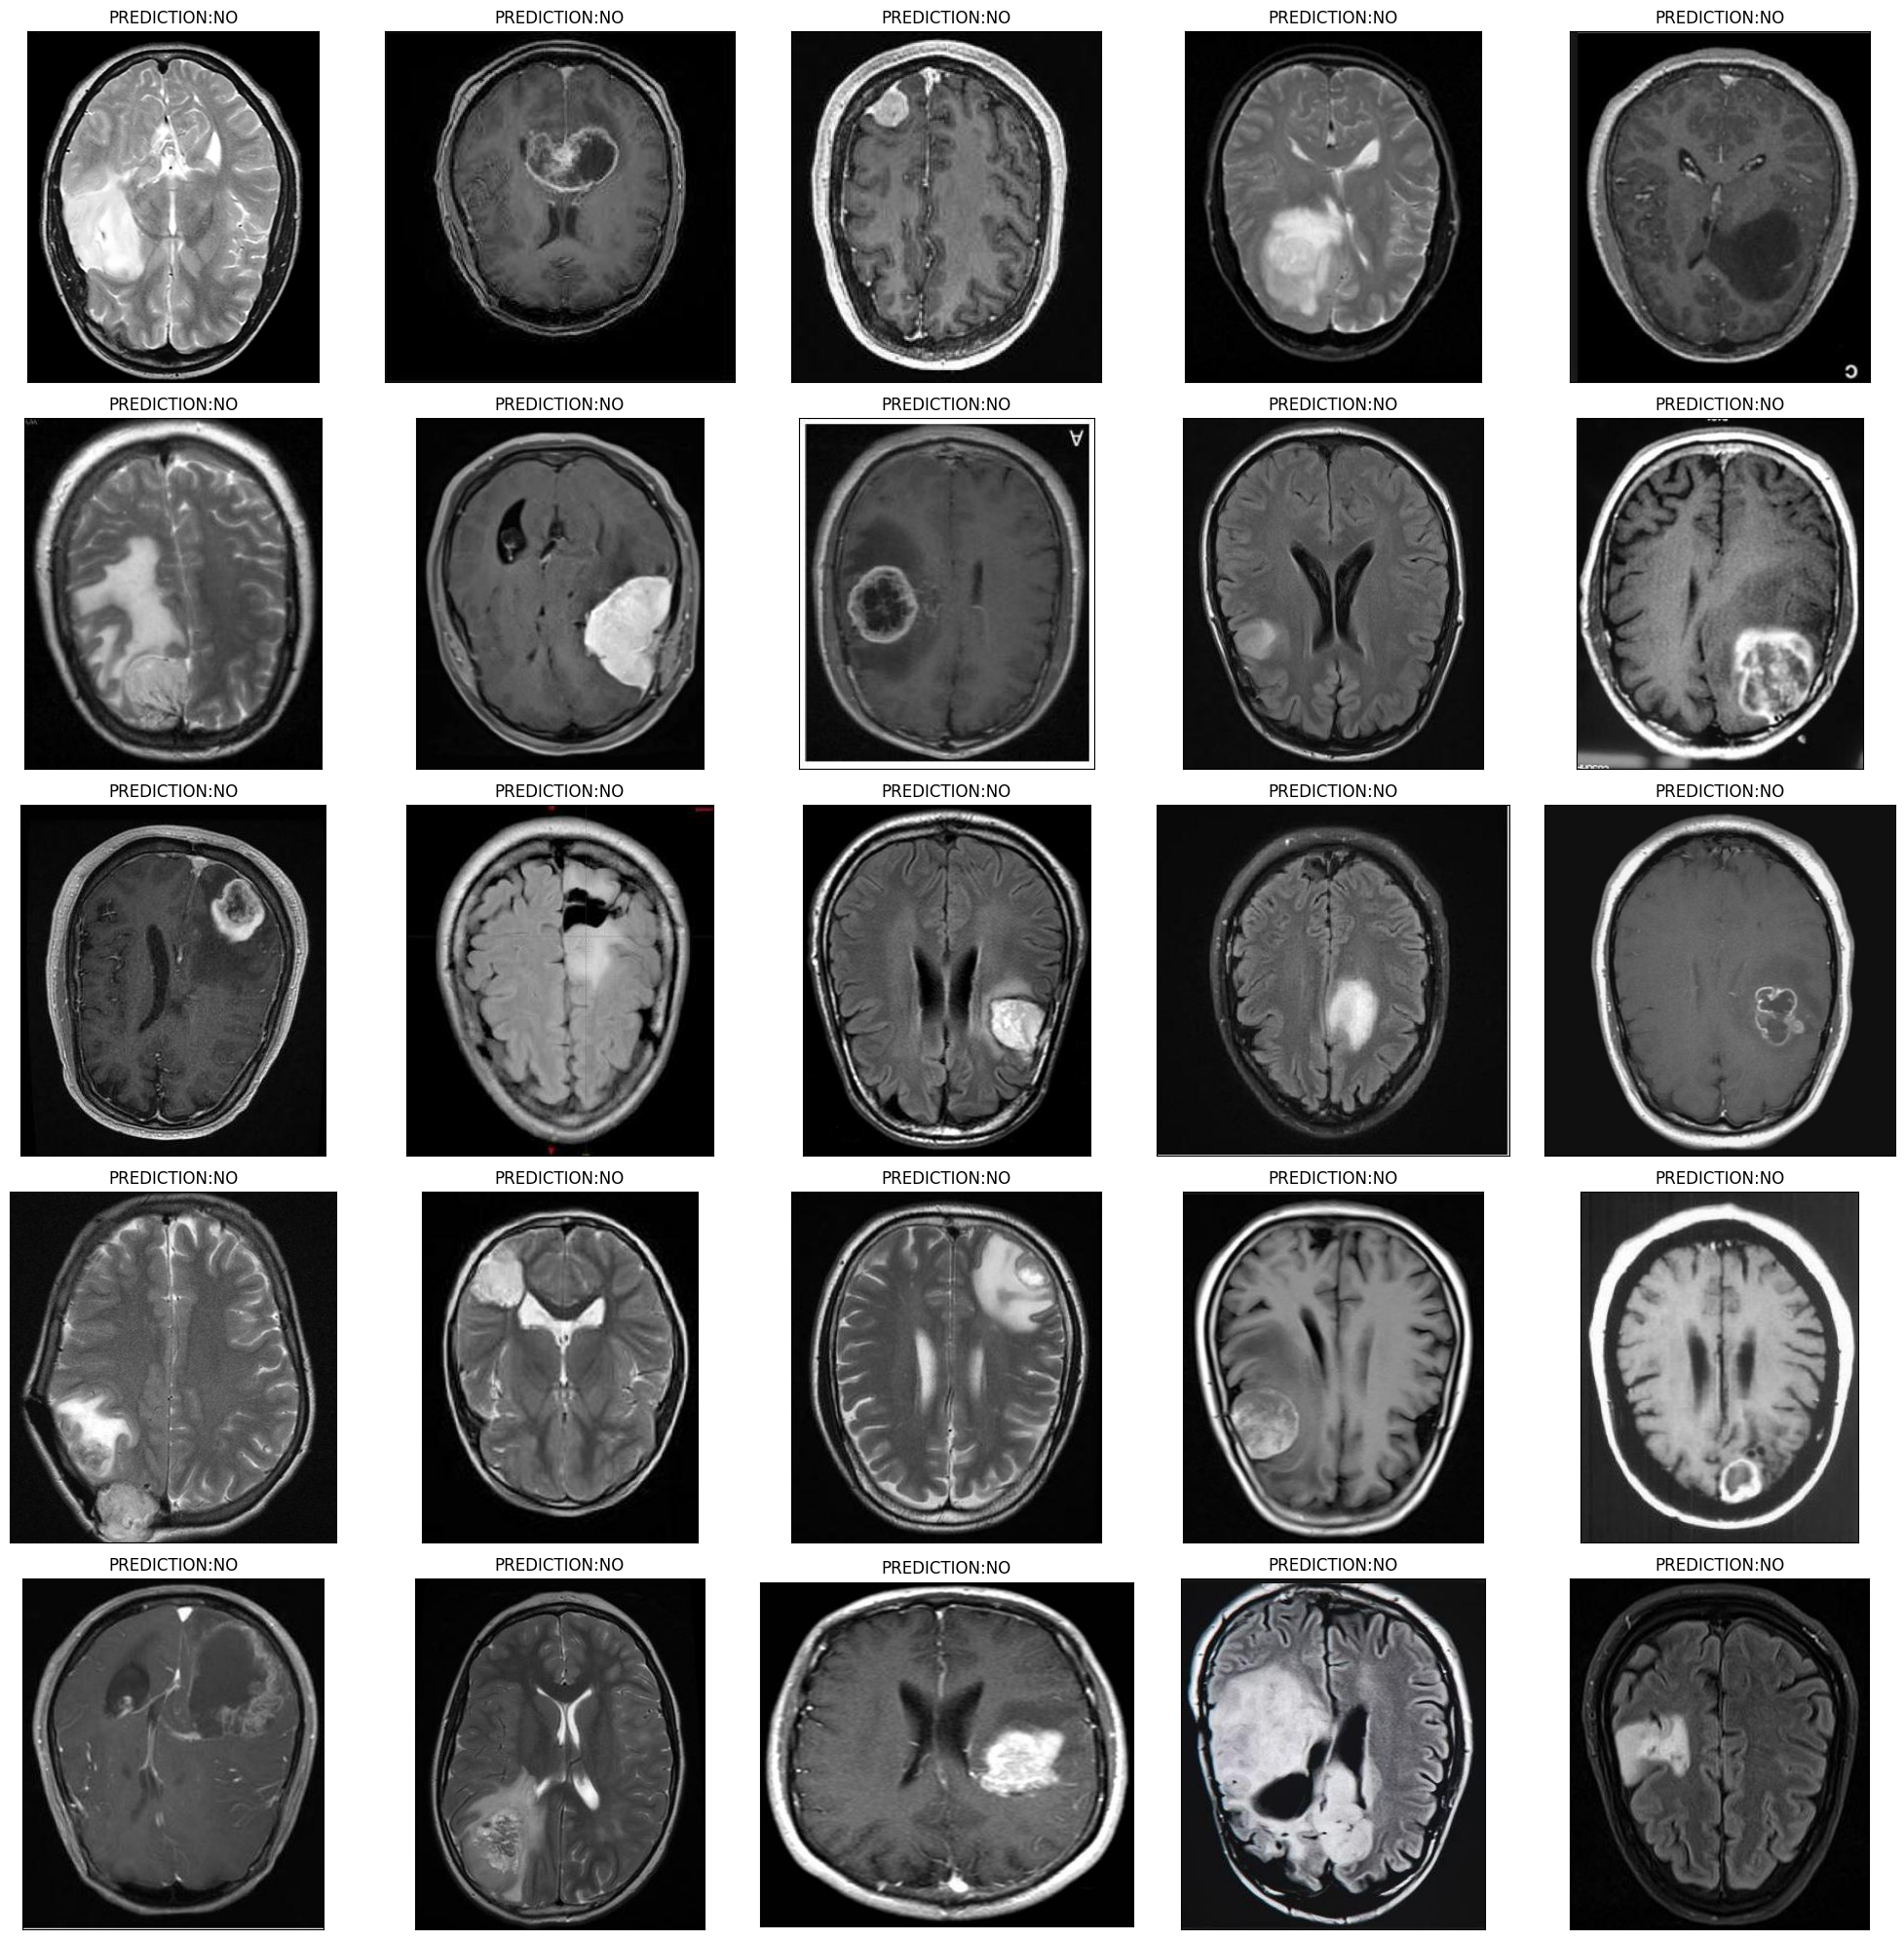

In [105]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction_Two[i]}")
plt.tight_layout()
plt.show()
